In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_boston
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
boston_dataset = load_boston()
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
boston_df[boston_df.isnull().any(axis=1)] #See the rows with null values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


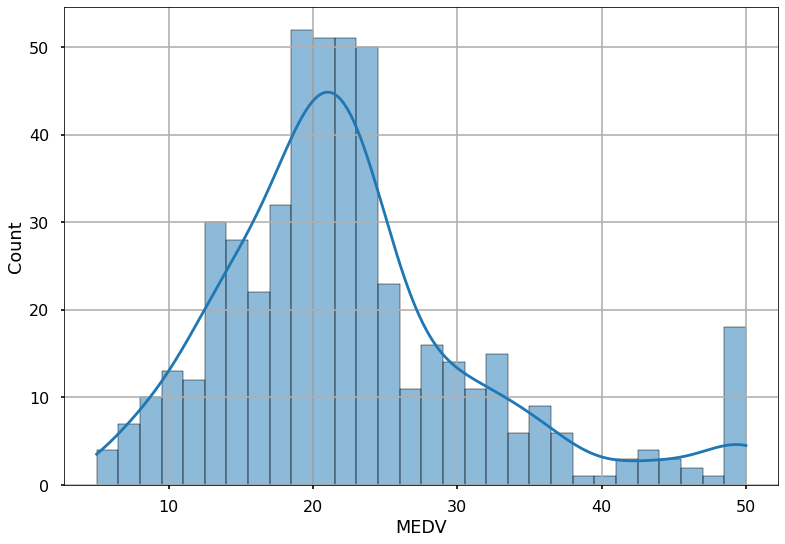

In [5]:
plt.style.use('seaborn-poster')
sb.histplot(boston_df['MEDV'], bins=30,kde = True)
plt.grid(True)
plt.show()

In [6]:
correlation_matrix = boston_df.corr().round(2)
correlation_matrix[abs(correlation_matrix['MEDV']) > 0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
PTRATIO,0.29,-0.39,0.38,-0.12,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51
LSTAT,0.46,-0.41,0.60,-0.05,0.59,-0.61,0.60,-0.50,0.49,0.54,0.37,-0.37,1.00,-0.74
MEDV,-0.39,0.36,-0.48,0.18,-0.43,0.70,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74,1.00


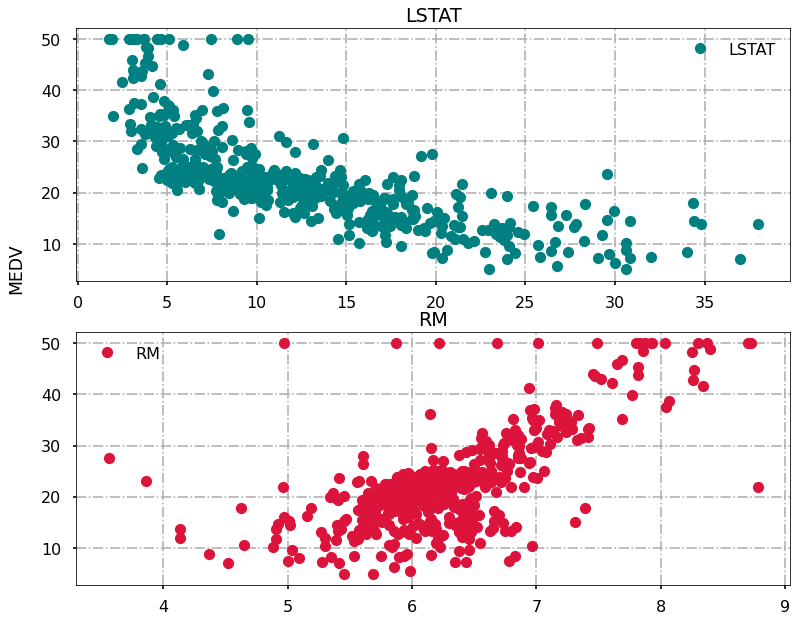

In [7]:
fig, ax = plt.subplots(2)
ax[0].plot(boston_df['LSTAT'], boston_df['MEDV'],'o', label = 'LSTAT', color = 'teal')
ax[1].plot(boston_df['RM'], boston_df['MEDV'],'o', label = 'RM', color = 'crimson')

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

## Machine learning

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential# import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import SGD, Adam

In [9]:
#Preparing data
x = np.array(pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM']))
y = np.array(boston_df['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(X_train.shape, y_train.shape)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train) #En este caso, se hace el fit y transform al mismo tiempo
X_test_norm = scaler.transform(X_test)
scaler = MinMaxScaler()
y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.reshape(-1, 1))

print(X_train_norm.shape)
y_train_norm.shape

(379, 2) (379,)
(379, 2)


(379, 1)

### Knn polynomial reg

In [10]:
#Polinomial regression
highest_comb = [0,0,0,20]
for deg in range(1,4):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)
    
    train_scores = []
    test_scores = []
    mses = []
    Ks = [1,3,5,7,9,11,13,15,17,19]
    for k in Ks:
        knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train_poly, y_train_poly) #Creates the object and trains it
        #y_predict_output = knnreg.predict(X_predict_input)#Predicts the output

        #Test the regression
        train_score = knnreg.score(X_train_poly, y_train_poly)
        train_scores.append(train_score)
        test_score = knnreg.score(X_test_poly, y_test_poly)
        test_scores.append(test_score)
        mse_train = mean_squared_error(y_train_poly, knnreg.predict(X_train_poly))
        mse_test = mean_squared_error(y_test_poly, knnreg.predict(X_test_poly))

        #print the outputs
        print('The score with K = {} is {} for the train set, poly {}'.format(k, train_score, deg))
        print('mse is {}\n'.format(mse_train))
        print('The score with K = {} is {} for the test set, poly {}'.format(k, test_score, deg))
        print('mse is {}\n'.format(mse_test))
        if (test_score > highest_comb[1]):
            highest_comb = [k, test_score, deg, mse_test]
        else:
            pass
        
    print('-'*40)
print('The best combination is K = {}, deg = {}, test score = {}, test mse = {}'.format(highest_comb[0], highest_comb[2], highest_comb[1], highest_comb[3]))

The score with K = 1 is 1.0 for the train set, poly 1
mse is 0.0

The score with K = 1 is 0.6235636260133947 for the test set, poly 1
mse is 37.2892125984252

The score with K = 3 is 0.8403328712816381 for the train set, poly 1
mse is 12.673262972735266

The score with K = 3 is 0.7964179543653974 for the test set, poly 1
mse is 20.16652668416448

The score with K = 5 is 0.8143169301663178 for the train set, poly 1
mse is 14.738226912928761

The score with K = 5 is 0.8142614269441393 for the test set, poly 1
mse is 18.398979527559064

The score with K = 7 is 0.7989820528711059 for the train set, poly 1
mse is 15.955402509288678

The score with K = 7 is 0.8125782803001179 for the test set, poly 1
mse is 18.565709464888318

The score with K = 9 is 0.786122294941213 for the train set, poly 1
mse is 16.976120394801132

The score with K = 9 is 0.8127636390580807 for the test set, poly 1
mse is 18.54734810926412

The score with K = 11 is 0.7742500476557607 for the train set, poly 1
mse is 17.

In [11]:
k = 7
deg = 3
poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(x)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)
knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train_poly, y_train_poly) #Creates the object and trains it

#Test the regression
train_score = knnreg.score(X_train_poly, y_train_poly)
test_score = knnreg.score(X_test_poly, y_test_poly)
mse_train = mean_squared_error(y_train_poly, knnreg.predict(X_train_poly))
knn_test_pred = knnreg.predict(X_test_poly)
mse_test = mean_squared_error(y_test_poly, knn_test_pred)

#print the outputs
print('The score with K = {} is {} for the train set, poly {}'.format(k, train_score, deg))
print('mse is {}\n'.format(mse_train))
print('The score with K = {} is {} for the test set, poly {}'.format(k, test_score, deg))
print('mse is {}\n'.format(mse_test))

The score with K = 7 is 0.797721785523342 for the train set, poly 3
mse is 16.055433740778632

The score with K = 7 is 0.8264173040633112 for the test set, poly 3
mse is 17.19483689538808



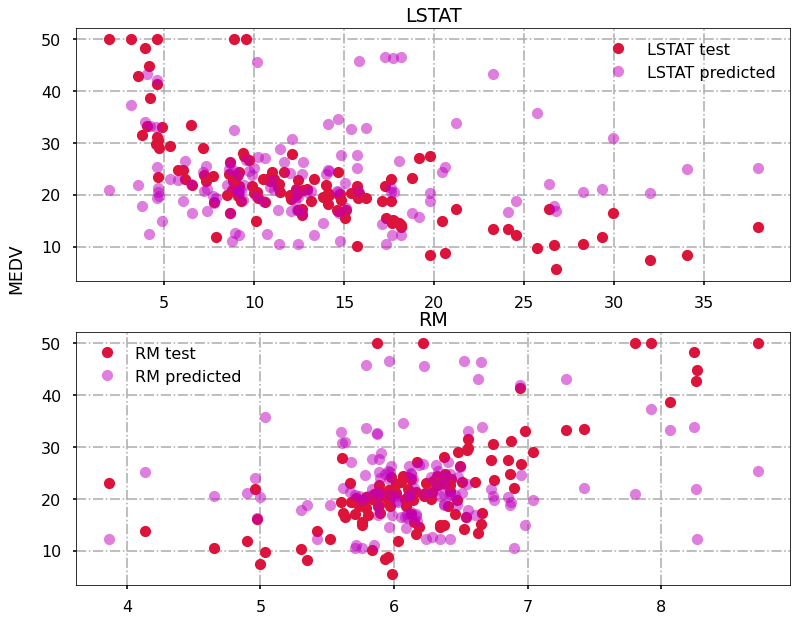

In [12]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(X_test[:, 0], y_test,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(X_test[:, 0], knnreg.predict(X_test_poly),'o', label = 'LSTAT predicted Knn', color = 'teal', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(X_test[:, 1], y_test,'o', label = 'RM test', color = 'crimson')
ax[1].plot(X_test[:, 1], knnreg.predict(X_test_poly),'o', label = 'RM predicted Knn', color = 'teal', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

### Polynomial regression

In [13]:
#Polynomial regression
train_scores = []
test_scores = []
highest_comb = [0,0, 20]
for deg in range(1,4):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)
    
    linreg = LinearRegression().fit(X_train_poly, y_train_poly)
    
    #Test the regression
    train_score = linreg.score(X_train_poly, y_train_poly)
    train_scores.append(train_score)
    test_score = linreg.score(X_test_poly, y_test_poly)
    test_scores.append(test_score)
    mse_train = mean_squared_error(y_train_poly, linreg.predict(X_train_poly))
    mse_test = mean_squared_error(y_test_poly, linreg.predict(X_test_poly))

    
    print('The score is {} for the train set deg = {}'.format(train_score, deg))
    print('mse is {}\n'.format(mse_train))
    print('The score is {} for the test set deg = {}'.format(test_score, deg))
    print('mse is {}\n'.format(mse_test))
    
    if (test_score > highest_comb[0]):
        highest_comb = [test_score, deg, mse_test]
        
print('The best deg is {} with a test score of {} an a mse of {}'.format(highest_comb[1],highest_comb[0], highest_comb[2]))

The score is 0.6124282780222445 for the train set deg = 1
mse is 30.76273991300924

The score is 0.6873549116447073 for the test set deg = 1
mse is 30.97014521755216

The score is 0.7247238404109919 for the train set deg = 2
mse is 21.849501450920396

The score is 0.8288789993442349 for the test set deg = 2
mse is 16.95098511849743

The score is 0.744740440153394 for the train set deg = 3
mse is 20.260723382499638

The score is 0.8221232175124191 for the test set deg = 3
mse is 17.620202554440862

The best deg is 2 with a test score of 0.8288789993442349 an a mse of 16.95098511849743


In [14]:
deg = 2
poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(x)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)

linreg = LinearRegression().fit(X_train_poly, y_train_poly)

#Test the regression
train_score = linreg.score(X_train_poly, y_train_poly)
test_score = linreg.score(X_test_poly, y_test_poly)
mse_train = mean_squared_error(y_train_poly, linreg.predict(X_train_poly))
lin_test_pred = linreg.predict(X_test_poly)
mse_test = mean_squared_error(y_test_poly, lin_test_pred)

print('The score is {} for the train set deg = {}, mse = {}'.format(train_score, deg, mse_train))
print('The score is {} for the test set deg = {}, mse = {}\n'.format(test_score, deg, mse_test))

The score is 0.7247238404109919 for the train set deg = 2, mse = 21.849501450920396
The score is 0.8288789993442349 for the test set deg = 2, mse = 16.95098511849743



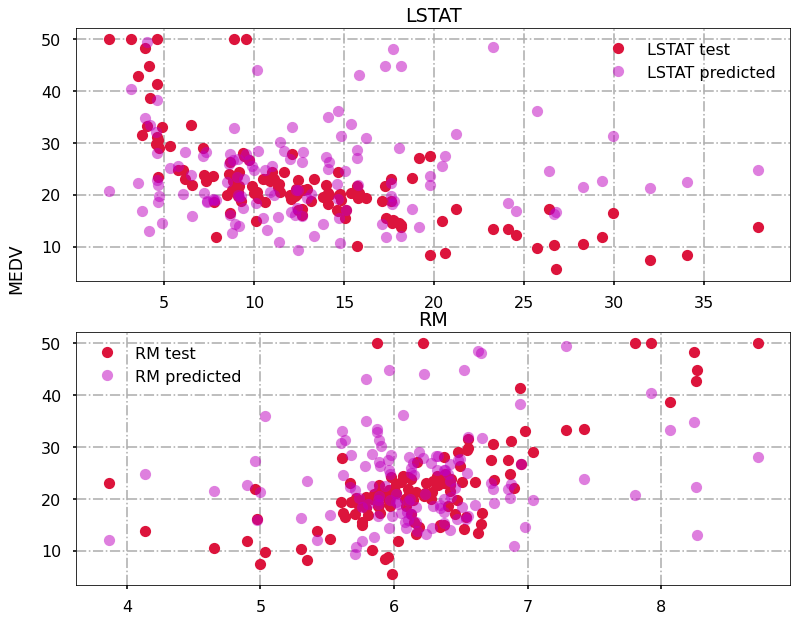

In [15]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(X_test[:, 0], y_test,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(X_test[:, 0], linreg.predict(X_test_poly),'o', label = 'LSTAT predicted Linear', color = 'm', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(X_test[:, 1], y_test,'o', label = 'RM test', color = 'crimson')
ax[1].plot(X_test[:, 1], linreg.predict(X_test_poly),'o', label = 'RM predicted Linear', color = 'm', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

### Ridge polynomial regression

In [16]:
#Polynomial regression
train_scores = []
test_scores = []
highest_comb = [0,0,0, 20]
alphas = [0, 1, 10, 15, 20, 25, 50, 100]
for deg in range(1,7):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)
    
    for a in alphas:
        linridge = Ridge(alpha = a).fit(X_train_poly, y_train_poly) #Creates the object and trains it
        train_score = linridge.score(X_train_poly, y_train_poly)
        test_score = linridge.score(X_test_poly, y_test_poly)
        mse_train = mean_squared_error(y_train_poly, linridge.predict(X_train_poly))
        mse_test = mean_squared_error(y_test_poly, linridge.predict(X_test_poly))

        print('The score with alpha = {} is {} for the train set, deg = {}'.format(a, train_score,deg))
        print('mse is {}\n'.format(mse_train))
        print('The score with alpha = {} is {} for the test set, deg = {}'.format(a, test_score,deg))
        print('mse is {}\n'.format(mse_test))

        if (test_score > highest_comb[0]):
            highest_comb = [a, test_score, deg, mse_test]
print('The best combination is alpha = {} with deg = {} with a score of {}, mse = {}'.format(highest_comb[0],highest_comb[2],highest_comb[1], highest_comb[3]))

The score with alpha = 0 is 0.6124282780222445 for the train set, deg = 1
mse is 30.76273991300925

The score with alpha = 0 is 0.6873549116447073 for the test set, deg = 1
mse is 30.970145217552158

The score with alpha = 1 is 0.6124232098338771 for the train set, deg = 1
mse is 30.763142190450388

The score with alpha = 1 is 0.6865285458870667 for the test set, deg = 1
mse is 31.052003748103765

The score with alpha = 10 is 0.6119937633625765 for the train set, deg = 1
mse is 30.797228655881266

The score with alpha = 10 is 0.6793358820526811 for the test set, deg = 1
mse is 31.76449804834625

The score with alpha = 15 is 0.6115263748677989 for the train set, deg = 1
mse is 30.83432669448379

The score with alpha = 15 is 0.6755397391505901 for the test set, deg = 1
mse is 32.14053816963144

The score with alpha = 20 is 0.6109444977318073 for the train set, deg = 1
mse is 30.880512042848455

The score with alpha = 20 is 0.6718893478892742 for the test set, deg = 1
mse is 32.5021403558

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34253e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76141e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66013e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55205e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59467e-19): result may not be accurate

In [17]:
alpha = 100
deg = 4

poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(x)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 1)

linridge = Ridge(alpha = alpha).fit(X_train_poly, y_train_poly) #Creates the object and trains it
train_score = linridge.score(X_train_poly, y_train_poly)
mse_train = mean_squared_error(y_train_poly, linridge.predict(X_train_poly))
test_score = linridge.score(X_test_poly, y_test_poly)
ridge_test_pred = linridge.predict(X_test_poly)
mse_test = mean_squared_error(y_test_poly, ridge_test_pred)


print('The score with alpha = {} is {} for the train set, deg = {}, mse = {}'.format(alpha, train_score,deg, mse_train))
print('The score with alpha = {} is {} for the test set, deg = {}, mse = {}\n'.format(alpha, test_score,deg, mse_test))

The score with alpha = 100 is 0.7360873385998484 for the train set, deg = 4, mse = 20.947546226989456
The score with alpha = 100 is 0.8316588206326376 for the test set, deg = 4, mse = 16.675620264907153



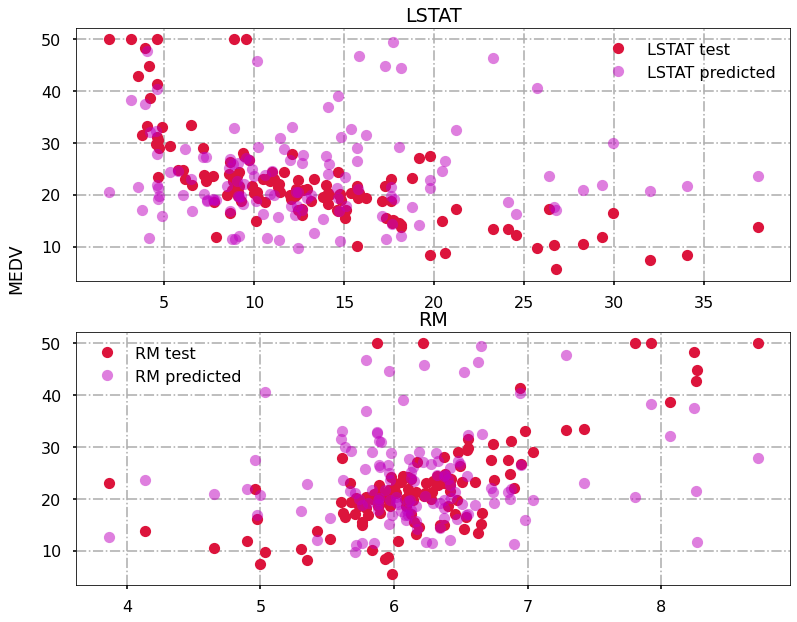

In [18]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(X_test[:, 0], y_test,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(X_test[:, 0], linridge.predict(X_test_poly),'o', label = 'LSTAT predicted Ridge', color = 'm', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(X_test[:, 1], y_test,'o', label = 'RM test', color = 'crimson')
ax[1].plot(X_test[:, 1], linridge.predict(X_test_poly),'o', label = 'RM predicted Ridge', color = 'm', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

Trying to unify Knn, Linear and Ridge regressions to improve the core

In [19]:
y_prom = (knn_test_pred+lin_test_pred+ridge_test_pred)/3
mean_squared_error(y_test,y_prom), r2_score(y_test,y_prom)

(129.23605336625658, -0.5818557013613315)

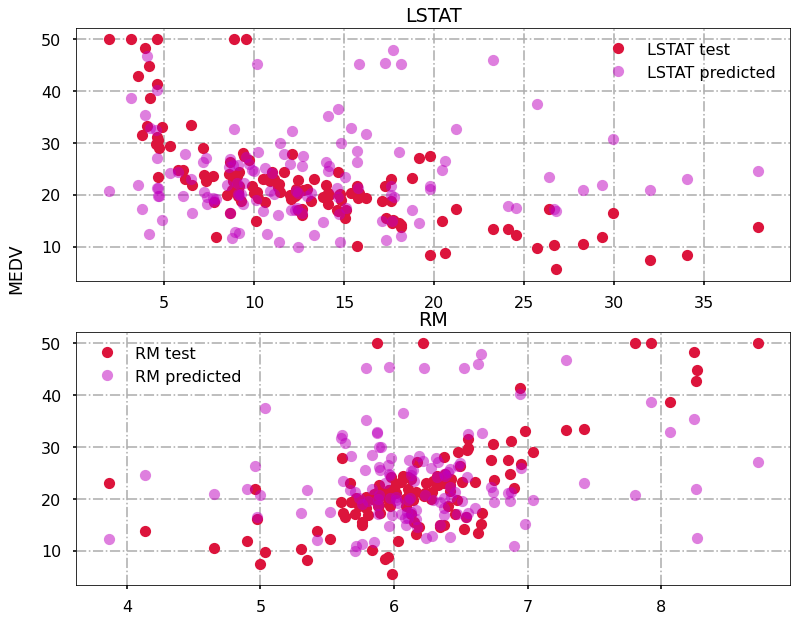

In [20]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(X_test[:, 0], y_test,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(X_test[:, 0], y_prom,'o', label = 'LSTAT predicted', color = 'm', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(X_test[:, 1], y_test,'o', label = 'RM test', color = 'crimson')
ax[1].plot(X_test[:, 1], y_prom,'o', label = 'RM predicted', color = 'm', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

## Deep learning

In [21]:
from sklearn.neural_network import MLPRegressor

deg = 1

poly = PolynomialFeatures(degree=deg)
X_poly = poly.fit_transform(x)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 10)

mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = 'relu',
                             alpha = 1.0,
                             solver = 'adam').fit(X_train, y_train)
mlpreg.score(X_test, y_test), mean_squared_error(y_test,mlpreg.predict(X_test))

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.6638067082933197, 27.466660929306492)

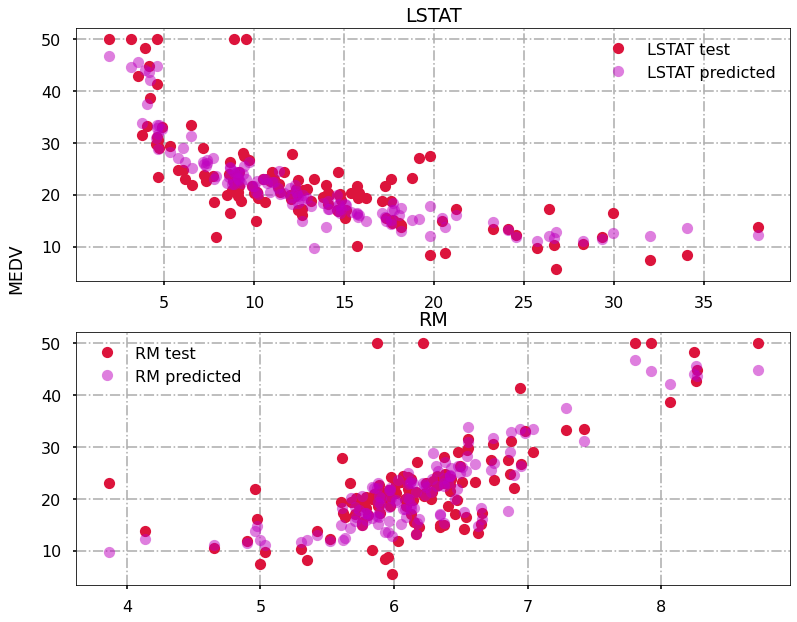

In [22]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(X_test[:, 0], y_test,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(X_test[:, 0], mlpreg.predict(X_test),'o', label = 'LSTAT predicted', color = 'm', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(X_test[:, 1], y_test,'o', label = 'RM test', color = 'crimson')
ax[1].plot(X_test[:, 1], mlpreg.predict(X_test),'o', label = 'RM predicted', color = 'm', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

In [34]:
model = Sequential()
model.add(Dense(800, input_dim=2, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='MeanSquaredError',optimizer=Adam(learning_rate=0.0005),metrics=['MeanSquaredError'])
model.fit(X_train,y_train,epochs=2000,batch_size=95,shuffle=True,validation_data = (X_test, y_test))

Epoch 1/2000
4/4 [==============================] - 1s 55ms/step - loss: 501.5495 - mean_squared_error: 501.5495 - val_loss: 277.8139 - val_mean_squared_error: 277.8139
Epoch 2/2000
4/4 [==============================] - 0s 24ms/step - loss: 299.8396 - mean_squared_error: 299.8396 - val_loss: 220.3933 - val_mean_squared_error: 220.3933
Epoch 3/2000
4/4 [==============================] - 0s 24ms/step - loss: 210.1336 - mean_squared_error: 210.1336 - val_loss: 160.2569 - val_mean_squared_error: 160.2569
Epoch 4/2000
4/4 [==============================] - 0s 24ms/step - loss: 135.1509 - mean_squared_error: 135.1509 - val_loss: 75.7001 - val_mean_squared_error: 75.7001
Epoch 5/2000
4/4 [==============================] - 0s 24ms/step - loss: 52.8312 - mean_squared_error: 52.8312 - val_loss: 33.5479 - val_mean_squared_error: 33.5479
Epoch 6/2000
4/4 [==============================] - 0s 24ms/step - loss: 30.0119 - mean_squared_error: 30.0119 - val_loss: 53.9994 - val_mean_squared_error: 53.9

4/4 [==============================] - 0s 24ms/step - loss: 20.8498 - mean_squared_error: 20.8498 - val_loss: 27.0686 - val_mean_squared_error: 27.0686
Epoch 100/2000
4/4 [==============================] - 0s 23ms/step - loss: 20.5403 - mean_squared_error: 20.5403 - val_loss: 28.3940 - val_mean_squared_error: 28.3940
Epoch 101/2000
4/4 [==============================] - 0s 24ms/step - loss: 20.0738 - mean_squared_error: 20.0738 - val_loss: 27.1818 - val_mean_squared_error: 27.1818
Epoch 102/2000
4/4 [==============================] - 0s 24ms/step - loss: 19.9457 - mean_squared_error: 19.9457 - val_loss: 27.1889 - val_mean_squared_error: 27.1889
Epoch 103/2000
4/4 [==============================] - 0s 23ms/step - loss: 20.0847 - mean_squared_error: 20.0847 - val_loss: 27.1039 - val_mean_squared_error: 27.1039
Epoch 104/2000
4/4 [==============================] - 0s 24ms/step - loss: 20.0645 - mean_squared_error: 20.0645 - val_loss: 27.6637 - val_mean_squared_error: 27.6637
Epoch 105/200

4/4 [==============================] - 0s 28ms/step - loss: 20.2799 - mean_squared_error: 20.2799 - val_loss: 26.9058 - val_mean_squared_error: 26.9058
Epoch 198/2000
4/4 [==============================] - 0s 29ms/step - loss: 19.9804 - mean_squared_error: 19.9804 - val_loss: 29.0253 - val_mean_squared_error: 29.0253
Epoch 199/2000
4/4 [==============================] - 0s 31ms/step - loss: 20.0887 - mean_squared_error: 20.0887 - val_loss: 27.7156 - val_mean_squared_error: 27.7156
Epoch 200/2000
4/4 [==============================] - 0s 30ms/step - loss: 19.8628 - mean_squared_error: 19.8628 - val_loss: 32.2081 - val_mean_squared_error: 32.2081
Epoch 201/2000
4/4 [==============================] - 0s 26ms/step - loss: 21.1463 - mean_squared_error: 21.1463 - val_loss: 27.8811 - val_mean_squared_error: 27.8811
Epoch 202/2000
4/4 [==============================] - 0s 28ms/step - loss: 21.3768 - mean_squared_error: 21.3768 - val_loss: 29.4646 - val_mean_squared_error: 29.4646
Epoch 203/200

4/4 [==============================] - 0s 26ms/step - loss: 21.7458 - mean_squared_error: 21.7458 - val_loss: 28.6478 - val_mean_squared_error: 28.6478
Epoch 296/2000
4/4 [==============================] - 0s 25ms/step - loss: 20.2182 - mean_squared_error: 20.2182 - val_loss: 31.3496 - val_mean_squared_error: 31.3496
Epoch 297/2000
4/4 [==============================] - 0s 25ms/step - loss: 21.3383 - mean_squared_error: 21.3383 - val_loss: 27.2267 - val_mean_squared_error: 27.2267
Epoch 298/2000
4/4 [==============================] - 0s 26ms/step - loss: 21.4889 - mean_squared_error: 21.4889 - val_loss: 27.7790 - val_mean_squared_error: 27.7790
Epoch 299/2000
4/4 [==============================] - 0s 26ms/step - loss: 20.6310 - mean_squared_error: 20.6310 - val_loss: 27.1952 - val_mean_squared_error: 27.1952
Epoch 300/2000
4/4 [==============================] - 0s 25ms/step - loss: 20.5373 - mean_squared_error: 20.5373 - val_loss: 27.1003 - val_mean_squared_error: 27.1003
Epoch 301/200

4/4 [==============================] - 0s 26ms/step - loss: 19.2482 - mean_squared_error: 19.2482 - val_loss: 26.9517 - val_mean_squared_error: 26.9517
Epoch 394/2000
4/4 [==============================] - 0s 21ms/step - loss: 20.3286 - mean_squared_error: 20.3286 - val_loss: 30.4705 - val_mean_squared_error: 30.4705
Epoch 395/2000
4/4 [==============================] - 0s 27ms/step - loss: 20.8306 - mean_squared_error: 20.8306 - val_loss: 27.5096 - val_mean_squared_error: 27.5096
Epoch 396/2000
4/4 [==============================] - 0s 26ms/step - loss: 20.6930 - mean_squared_error: 20.6930 - val_loss: 28.9417 - val_mean_squared_error: 28.9417
Epoch 397/2000
4/4 [==============================] - 0s 26ms/step - loss: 19.7592 - mean_squared_error: 19.7592 - val_loss: 27.0635 - val_mean_squared_error: 27.0635
Epoch 398/2000
4/4 [==============================] - 0s 28ms/step - loss: 20.5944 - mean_squared_error: 20.5944 - val_loss: 28.6053 - val_mean_squared_error: 28.6053
Epoch 399/200

4/4 [==============================] - 0s 31ms/step - loss: 20.0337 - mean_squared_error: 20.0337 - val_loss: 30.6643 - val_mean_squared_error: 30.6643
Epoch 492/2000
4/4 [==============================] - 0s 29ms/step - loss: 21.2766 - mean_squared_error: 21.2766 - val_loss: 28.5220 - val_mean_squared_error: 28.5220
Epoch 493/2000
4/4 [==============================] - 0s 28ms/step - loss: 20.5677 - mean_squared_error: 20.5677 - val_loss: 28.4188 - val_mean_squared_error: 28.4188
Epoch 494/2000
4/4 [==============================] - 0s 28ms/step - loss: 20.3323 - mean_squared_error: 20.3323 - val_loss: 27.0881 - val_mean_squared_error: 27.0881
Epoch 495/2000
4/4 [==============================] - 0s 27ms/step - loss: 20.6744 - mean_squared_error: 20.6744 - val_loss: 29.2973 - val_mean_squared_error: 29.2973
Epoch 496/2000
4/4 [==============================] - 0s 27ms/step - loss: 20.0306 - mean_squared_error: 20.0306 - val_loss: 27.5033 - val_mean_squared_error: 27.5033
Epoch 497/200

4/4 [==============================] - 0s 27ms/step - loss: 19.4010 - mean_squared_error: 19.4010 - val_loss: 26.0683 - val_mean_squared_error: 26.0683
Epoch 590/2000
4/4 [==============================] - 0s 26ms/step - loss: 19.2329 - mean_squared_error: 19.2329 - val_loss: 27.3721 - val_mean_squared_error: 27.3721
Epoch 591/2000
4/4 [==============================] - 0s 26ms/step - loss: 19.0817 - mean_squared_error: 19.0817 - val_loss: 26.4817 - val_mean_squared_error: 26.4817
Epoch 592/2000
4/4 [==============================] - 0s 26ms/step - loss: 19.0902 - mean_squared_error: 19.0902 - val_loss: 26.4042 - val_mean_squared_error: 26.4042
Epoch 593/2000
4/4 [==============================] - 0s 27ms/step - loss: 19.5823 - mean_squared_error: 19.5823 - val_loss: 26.9573 - val_mean_squared_error: 26.9573
Epoch 594/2000
4/4 [==============================] - 0s 27ms/step - loss: 19.9675 - mean_squared_error: 19.9675 - val_loss: 28.4830 - val_mean_squared_error: 28.4830
Epoch 595/200

4/4 [==============================] - 0s 26ms/step - loss: 20.1907 - mean_squared_error: 20.1907 - val_loss: 31.4772 - val_mean_squared_error: 31.4772
Epoch 688/2000
4/4 [==============================] - 0s 20ms/step - loss: 21.5122 - mean_squared_error: 21.5122 - val_loss: 28.9538 - val_mean_squared_error: 28.9538
Epoch 689/2000
4/4 [==============================] - 0s 31ms/step - loss: 20.3283 - mean_squared_error: 20.3283 - val_loss: 30.5410 - val_mean_squared_error: 30.5410
Epoch 690/2000
4/4 [==============================] - 0s 27ms/step - loss: 20.5994 - mean_squared_error: 20.5994 - val_loss: 27.7362 - val_mean_squared_error: 27.7362
Epoch 691/2000
4/4 [==============================] - 0s 27ms/step - loss: 19.5248 - mean_squared_error: 19.5248 - val_loss: 29.3579 - val_mean_squared_error: 29.3579
Epoch 692/2000
4/4 [==============================] - 0s 26ms/step - loss: 19.6081 - mean_squared_error: 19.6081 - val_loss: 26.2986 - val_mean_squared_error: 26.2986
Epoch 693/200

4/4 [==============================] - 0s 26ms/step - loss: 18.1088 - mean_squared_error: 18.1088 - val_loss: 25.4038 - val_mean_squared_error: 25.4038
Epoch 786/2000
4/4 [==============================] - 0s 26ms/step - loss: 16.5529 - mean_squared_error: 16.5529 - val_loss: 26.8022 - val_mean_squared_error: 26.8022
Epoch 787/2000
4/4 [==============================] - 0s 26ms/step - loss: 16.0213 - mean_squared_error: 16.0213 - val_loss: 25.0364 - val_mean_squared_error: 25.0364
Epoch 788/2000
4/4 [==============================] - 0s 26ms/step - loss: 16.9780 - mean_squared_error: 16.9780 - val_loss: 27.1883 - val_mean_squared_error: 27.1883
Epoch 789/2000
4/4 [==============================] - 0s 28ms/step - loss: 17.1424 - mean_squared_error: 17.1424 - val_loss: 26.1208 - val_mean_squared_error: 26.1208
Epoch 790/2000
4/4 [==============================] - 0s 32ms/step - loss: 17.3223 - mean_squared_error: 17.3223 - val_loss: 29.0286 - val_mean_squared_error: 29.0286
Epoch 791/200

4/4 [==============================] - 0s 28ms/step - loss: 14.7603 - mean_squared_error: 14.7603 - val_loss: 25.5935 - val_mean_squared_error: 25.5935
Epoch 884/2000
4/4 [==============================] - 0s 28ms/step - loss: 15.3878 - mean_squared_error: 15.3878 - val_loss: 26.7936 - val_mean_squared_error: 26.7936
Epoch 885/2000
4/4 [==============================] - 0s 27ms/step - loss: 15.1237 - mean_squared_error: 15.1237 - val_loss: 25.3537 - val_mean_squared_error: 25.3537
Epoch 886/2000
4/4 [==============================] - 0s 27ms/step - loss: 15.4558 - mean_squared_error: 15.4558 - val_loss: 26.1795 - val_mean_squared_error: 26.1795
Epoch 887/2000
4/4 [==============================] - 0s 27ms/step - loss: 14.7556 - mean_squared_error: 14.7556 - val_loss: 25.5284 - val_mean_squared_error: 25.5284
Epoch 888/2000
4/4 [==============================] - 0s 28ms/step - loss: 15.1488 - mean_squared_error: 15.1488 - val_loss: 25.4644 - val_mean_squared_error: 25.4644
Epoch 889/200

Epoch 981/2000
4/4 [==============================] - 0s 32ms/step - loss: 14.8271 - mean_squared_error: 14.8271 - val_loss: 25.7174 - val_mean_squared_error: 25.7174
Epoch 982/2000
4/4 [==============================] - 0s 32ms/step - loss: 14.3343 - mean_squared_error: 14.3343 - val_loss: 25.6488 - val_mean_squared_error: 25.6488
Epoch 983/2000
4/4 [==============================] - 0s 28ms/step - loss: 13.3698 - mean_squared_error: 13.3698 - val_loss: 25.7532 - val_mean_squared_error: 25.7532
Epoch 984/2000
4/4 [==============================] - 0s 26ms/step - loss: 13.4480 - mean_squared_error: 13.4480 - val_loss: 26.0222 - val_mean_squared_error: 26.0222
Epoch 985/2000
4/4 [==============================] - 0s 26ms/step - loss: 13.3609 - mean_squared_error: 13.3609 - val_loss: 26.3026 - val_mean_squared_error: 26.3026
Epoch 986/2000
4/4 [==============================] - 0s 31ms/step - loss: 13.8952 - mean_squared_error: 13.8952 - val_loss: 25.5955 - val_mean_squared_error: 25.595

Epoch 1030/2000
4/4 [==============================] - 0s 27ms/step - loss: 13.2088 - mean_squared_error: 13.2088 - val_loss: 25.6458 - val_mean_squared_error: 25.6458
Epoch 1031/2000
4/4 [==============================] - 0s 26ms/step - loss: 13.5900 - mean_squared_error: 13.5900 - val_loss: 25.4808 - val_mean_squared_error: 25.4808
Epoch 1032/2000
4/4 [==============================] - 0s 27ms/step - loss: 13.0278 - mean_squared_error: 13.0278 - val_loss: 27.3435 - val_mean_squared_error: 27.3435
Epoch 1033/2000
4/4 [==============================] - 0s 28ms/step - loss: 14.0769 - mean_squared_error: 14.0769 - val_loss: 26.2021 - val_mean_squared_error: 26.2021
Epoch 1034/2000
4/4 [==============================] - 0s 28ms/step - loss: 14.6889 - mean_squared_error: 14.6889 - val_loss: 29.6165 - val_mean_squared_error: 29.6165
Epoch 1035/2000
4/4 [==============================] - 0s 22ms/step - loss: 15.9479 - mean_squared_error: 15.9479 - val_loss: 29.0862 - val_mean_squared_error: 

Epoch 1079/2000
4/4 [==============================] - 0s 28ms/step - loss: 12.9584 - mean_squared_error: 12.9584 - val_loss: 27.0902 - val_mean_squared_error: 27.0902
Epoch 1080/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.1561 - mean_squared_error: 12.1561 - val_loss: 25.4404 - val_mean_squared_error: 25.4404
Epoch 1081/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.6399 - mean_squared_error: 12.6399 - val_loss: 27.3003 - val_mean_squared_error: 27.3003
Epoch 1082/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.6452 - mean_squared_error: 12.6452 - val_loss: 25.6249 - val_mean_squared_error: 25.6249
Epoch 1083/2000
4/4 [==============================] - 0s 22ms/step - loss: 12.7857 - mean_squared_error: 12.7857 - val_loss: 26.4246 - val_mean_squared_error: 26.4246
Epoch 1084/2000
4/4 [==============================] - 0s 27ms/step - loss: 13.3360 - mean_squared_error: 13.3360 - val_loss: 27.2593 - val_mean_squared_error: 

Epoch 1128/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.4804 - mean_squared_error: 12.4804 - val_loss: 26.8927 - val_mean_squared_error: 26.8927
Epoch 1129/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.0548 - mean_squared_error: 12.0548 - val_loss: 27.8212 - val_mean_squared_error: 27.8212
Epoch 1130/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.7643 - mean_squared_error: 11.7643 - val_loss: 26.0782 - val_mean_squared_error: 26.0782
Epoch 1131/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.0134 - mean_squared_error: 12.0134 - val_loss: 27.0694 - val_mean_squared_error: 27.0694
Epoch 1132/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.8648 - mean_squared_error: 11.8648 - val_loss: 27.0834 - val_mean_squared_error: 27.0834
Epoch 1133/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.0099 - mean_squared_error: 12.0099 - val_loss: 26.8481 - val_mean_squared_error: 

Epoch 1177/2000
4/4 [==============================] - 0s 21ms/step - loss: 13.0108 - mean_squared_error: 13.0108 - val_loss: 27.2715 - val_mean_squared_error: 27.2715
Epoch 1178/2000
4/4 [==============================] - 0s 25ms/step - loss: 12.4507 - mean_squared_error: 12.4507 - val_loss: 28.1409 - val_mean_squared_error: 28.1409
Epoch 1179/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.6156 - mean_squared_error: 12.6156 - val_loss: 27.9991 - val_mean_squared_error: 27.9991
Epoch 1180/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.9345 - mean_squared_error: 12.9345 - val_loss: 27.0573 - val_mean_squared_error: 27.0573
Epoch 1181/2000
4/4 [==============================] - 0s 20ms/step - loss: 12.5991 - mean_squared_error: 12.5991 - val_loss: 28.0691 - val_mean_squared_error: 28.0691
Epoch 1182/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.7895 - mean_squared_error: 12.7895 - val_loss: 26.1932 - val_mean_squared_error: 

Epoch 1226/2000
4/4 [==============================] - 0s 21ms/step - loss: 14.7695 - mean_squared_error: 14.7695 - val_loss: 28.9481 - val_mean_squared_error: 28.9481
Epoch 1227/2000
4/4 [==============================] - 0s 24ms/step - loss: 13.6487 - mean_squared_error: 13.6487 - val_loss: 27.4617 - val_mean_squared_error: 27.4617
Epoch 1228/2000
4/4 [==============================] - 0s 21ms/step - loss: 12.5153 - mean_squared_error: 12.5153 - val_loss: 27.2122 - val_mean_squared_error: 27.2122
Epoch 1229/2000
4/4 [==============================] - 0s 26ms/step - loss: 11.9451 - mean_squared_error: 11.9451 - val_loss: 27.3423 - val_mean_squared_error: 27.3423
Epoch 1230/2000
4/4 [==============================] - 0s 26ms/step - loss: 12.2204 - mean_squared_error: 12.2204 - val_loss: 27.0945 - val_mean_squared_error: 27.0945
Epoch 1231/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.4660 - mean_squared_error: 12.4660 - val_loss: 27.0462 - val_mean_squared_error: 

Epoch 1323/2000
4/4 [==============================] - 0s 28ms/step - loss: 11.5661 - mean_squared_error: 11.5661 - val_loss: 27.0797 - val_mean_squared_error: 27.0797
Epoch 1324/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.4574 - mean_squared_error: 11.4574 - val_loss: 29.5410 - val_mean_squared_error: 29.5410
Epoch 1325/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.9723 - mean_squared_error: 11.9723 - val_loss: 28.3228 - val_mean_squared_error: 28.3228
Epoch 1326/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.6784 - mean_squared_error: 11.6784 - val_loss: 27.4567 - val_mean_squared_error: 27.4567
Epoch 1327/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.4715 - mean_squared_error: 12.4715 - val_loss: 29.1054 - val_mean_squared_error: 29.1054
Epoch 1328/2000
4/4 [==============================] - 0s 28ms/step - loss: 11.4107 - mean_squared_error: 11.4107 - val_loss: 28.8255 - val_mean_squared_error: 

Epoch 1372/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.2273 - mean_squared_error: 11.2273 - val_loss: 30.0737 - val_mean_squared_error: 30.0737
Epoch 1373/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.9436 - mean_squared_error: 11.9436 - val_loss: 29.8875 - val_mean_squared_error: 29.8875
Epoch 1374/2000
4/4 [==============================] - 0s 27ms/step - loss: 12.0050 - mean_squared_error: 12.0050 - val_loss: 29.7799 - val_mean_squared_error: 29.7799
Epoch 1375/2000
4/4 [==============================] - 0s 28ms/step - loss: 11.3011 - mean_squared_error: 11.3011 - val_loss: 28.4712 - val_mean_squared_error: 28.4712
Epoch 1376/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.1126 - mean_squared_error: 11.1126 - val_loss: 30.9778 - val_mean_squared_error: 30.9778
Epoch 1377/2000
4/4 [==============================] - 0s 29ms/step - loss: 11.8037 - mean_squared_error: 11.8037 - val_loss: 28.4499 - val_mean_squared_error: 

Epoch 1421/2000
4/4 [==============================] - 0s 35ms/step - loss: 11.4558 - mean_squared_error: 11.4558 - val_loss: 30.2050 - val_mean_squared_error: 30.2050
Epoch 1422/2000
4/4 [==============================] - 0s 34ms/step - loss: 10.8339 - mean_squared_error: 10.8339 - val_loss: 28.6901 - val_mean_squared_error: 28.6901
Epoch 1423/2000
4/4 [==============================] - 0s 28ms/step - loss: 10.7161 - mean_squared_error: 10.7161 - val_loss: 29.8525 - val_mean_squared_error: 29.8525
Epoch 1424/2000
4/4 [==============================] - 0s 28ms/step - loss: 11.1557 - mean_squared_error: 11.1557 - val_loss: 30.0165 - val_mean_squared_error: 30.0165
Epoch 1425/2000
4/4 [==============================] - 0s 26ms/step - loss: 11.1547 - mean_squared_error: 11.1547 - val_loss: 30.1341 - val_mean_squared_error: 30.1341
Epoch 1426/2000
4/4 [==============================] - 0s 26ms/step - loss: 11.2083 - mean_squared_error: 11.2083 - val_loss: 28.2296 - val_mean_squared_error: 

Epoch 1470/2000
4/4 [==============================] - 0s 29ms/step - loss: 10.6338 - mean_squared_error: 10.6338 - val_loss: 29.8078 - val_mean_squared_error: 29.8078
Epoch 1471/2000
4/4 [==============================] - 0s 30ms/step - loss: 11.1383 - mean_squared_error: 11.1383 - val_loss: 28.6473 - val_mean_squared_error: 28.6473
Epoch 1472/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.5141 - mean_squared_error: 11.5141 - val_loss: 30.8654 - val_mean_squared_error: 30.8654
Epoch 1473/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.2093 - mean_squared_error: 11.2093 - val_loss: 30.5113 - val_mean_squared_error: 30.5113
Epoch 1474/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.2798 - mean_squared_error: 10.2798 - val_loss: 29.2983 - val_mean_squared_error: 29.2983
Epoch 1475/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.0595 - mean_squared_error: 10.0595 - val_loss: 29.7257 - val_mean_squared_error: 

Epoch 1567/2000
4/4 [==============================] - 0s 30ms/step - loss: 10.4926 - mean_squared_error: 10.4926 - val_loss: 30.6802 - val_mean_squared_error: 30.6802
Epoch 1568/2000
4/4 [==============================] - 0s 29ms/step - loss: 10.0160 - mean_squared_error: 10.0160 - val_loss: 31.9241 - val_mean_squared_error: 31.9241
Epoch 1569/2000
4/4 [==============================] - 0s 29ms/step - loss: 9.9525 - mean_squared_error: 9.9525 - val_loss: 30.1555 - val_mean_squared_error: 30.1555
Epoch 1570/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.0896 - mean_squared_error: 11.0896 - val_loss: 30.5167 - val_mean_squared_error: 30.5167
Epoch 1571/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.8710 - mean_squared_error: 9.8710 - val_loss: 31.9580 - val_mean_squared_error: 31.9580
Epoch 1572/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.2213 - mean_squared_error: 10.2213 - val_loss: 29.8239 - val_mean_squared_error: 29.8

4/4 [==============================] - 0s 28ms/step - loss: 9.9532 - mean_squared_error: 9.9532 - val_loss: 32.0759 - val_mean_squared_error: 32.0759
Epoch 1617/2000
4/4 [==============================] - 0s 27ms/step - loss: 11.4689 - mean_squared_error: 11.4689 - val_loss: 31.0991 - val_mean_squared_error: 31.0991
Epoch 1618/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.0136 - mean_squared_error: 10.0136 - val_loss: 32.4078 - val_mean_squared_error: 32.4078
Epoch 1619/2000
4/4 [==============================] - 0s 29ms/step - loss: 11.3938 - mean_squared_error: 11.3938 - val_loss: 30.8171 - val_mean_squared_error: 30.8171
Epoch 1620/2000
4/4 [==============================] - 0s 30ms/step - loss: 10.1025 - mean_squared_error: 10.1025 - val_loss: 30.0461 - val_mean_squared_error: 30.0461
Epoch 1621/2000
4/4 [==============================] - 0s 28ms/step - loss: 9.9216 - mean_squared_error: 9.9216 - val_loss: 31.6804 - val_mean_squared_error: 31.6804
Epoch 1622/2

4/4 [==============================] - 0s 28ms/step - loss: 10.4241 - mean_squared_error: 10.4241 - val_loss: 30.5662 - val_mean_squared_error: 30.5662
Epoch 1666/2000
4/4 [==============================] - 0s 28ms/step - loss: 10.5156 - mean_squared_error: 10.5156 - val_loss: 31.1291 - val_mean_squared_error: 31.1291
Epoch 1667/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.2088 - mean_squared_error: 10.2088 - val_loss: 31.5555 - val_mean_squared_error: 31.5555
Epoch 1668/2000
4/4 [==============================] - 0s 29ms/step - loss: 10.4727 - mean_squared_error: 10.4727 - val_loss: 31.7049 - val_mean_squared_error: 31.7049
Epoch 1669/2000
4/4 [==============================] - 0s 27ms/step - loss: 10.8399 - mean_squared_error: 10.8399 - val_loss: 29.8764 - val_mean_squared_error: 29.8764
Epoch 1670/2000
4/4 [==============================] - 0s 26ms/step - loss: 10.3286 - mean_squared_error: 10.3286 - val_loss: 33.1458 - val_mean_squared_error: 33.1459
Epoch 16

4/4 [==============================] - 0s 26ms/step - loss: 9.3466 - mean_squared_error: 9.3466 - val_loss: 30.7496 - val_mean_squared_error: 30.7496
Epoch 1764/2000
4/4 [==============================] - 0s 20ms/step - loss: 9.4160 - mean_squared_error: 9.4160 - val_loss: 31.1886 - val_mean_squared_error: 31.1886
Epoch 1765/2000
4/4 [==============================] - 0s 28ms/step - loss: 8.9720 - mean_squared_error: 8.9720 - val_loss: 32.1635 - val_mean_squared_error: 32.1635
Epoch 1766/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.7500 - mean_squared_error: 9.7500 - val_loss: 30.6258 - val_mean_squared_error: 30.6258
Epoch 1767/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.3931 - mean_squared_error: 9.3931 - val_loss: 32.1470 - val_mean_squared_error: 32.1470
Epoch 1768/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.5669 - mean_squared_error: 9.5669 - val_loss: 30.3377 - val_mean_squared_error: 30.3377
Epoch 1769/2000
4/4 

4/4 [==============================] - 0s 26ms/step - loss: 9.7945 - mean_squared_error: 9.7945 - val_loss: 34.3145 - val_mean_squared_error: 34.3145
Epoch 1862/2000
4/4 [==============================] - 0s 26ms/step - loss: 9.0357 - mean_squared_error: 9.0357 - val_loss: 31.5355 - val_mean_squared_error: 31.5355
Epoch 1863/2000
4/4 [==============================] - 0s 28ms/step - loss: 8.9189 - mean_squared_error: 8.9189 - val_loss: 31.3321 - val_mean_squared_error: 31.3321
Epoch 1864/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.7368 - mean_squared_error: 9.7368 - val_loss: 34.6891 - val_mean_squared_error: 34.6891
Epoch 1865/2000
4/4 [==============================] - 0s 36ms/step - loss: 10.1109 - mean_squared_error: 10.1109 - val_loss: 31.2706 - val_mean_squared_error: 31.2706
Epoch 1866/2000
4/4 [==============================] - 0s 39ms/step - loss: 9.4552 - mean_squared_error: 9.4552 - val_loss: 31.4470 - val_mean_squared_error: 31.4470
Epoch 1867/2000
4/

4/4 [==============================] - 0s 26ms/step - loss: 9.2498 - mean_squared_error: 9.2498 - val_loss: 31.8094 - val_mean_squared_error: 31.8094
Epoch 1960/2000
4/4 [==============================] - 0s 26ms/step - loss: 9.1290 - mean_squared_error: 9.1290 - val_loss: 33.3338 - val_mean_squared_error: 33.3338
Epoch 1961/2000
4/4 [==============================] - 0s 24ms/step - loss: 9.1935 - mean_squared_error: 9.1935 - val_loss: 32.6670 - val_mean_squared_error: 32.6670
Epoch 1962/2000
4/4 [==============================] - 0s 27ms/step - loss: 9.3251 - mean_squared_error: 9.3251 - val_loss: 32.0001 - val_mean_squared_error: 32.0001
Epoch 1963/2000
4/4 [==============================] - 0s 26ms/step - loss: 9.0067 - mean_squared_error: 9.0067 - val_loss: 31.6120 - val_mean_squared_error: 31.6120
Epoch 1964/2000
4/4 [==============================] - 0s 26ms/step - loss: 8.8511 - mean_squared_error: 8.8511 - val_loss: 32.5713 - val_mean_squared_error: 32.5713
Epoch 1965/2000
4/4 

In [28]:
#model.reset_metrics()
#model.reset_states()

In [39]:
r2_score(y,model.predict(x)), mean_squared_error(y,model.predict(x))

(0.8303631131518935, 14.32067069543083)

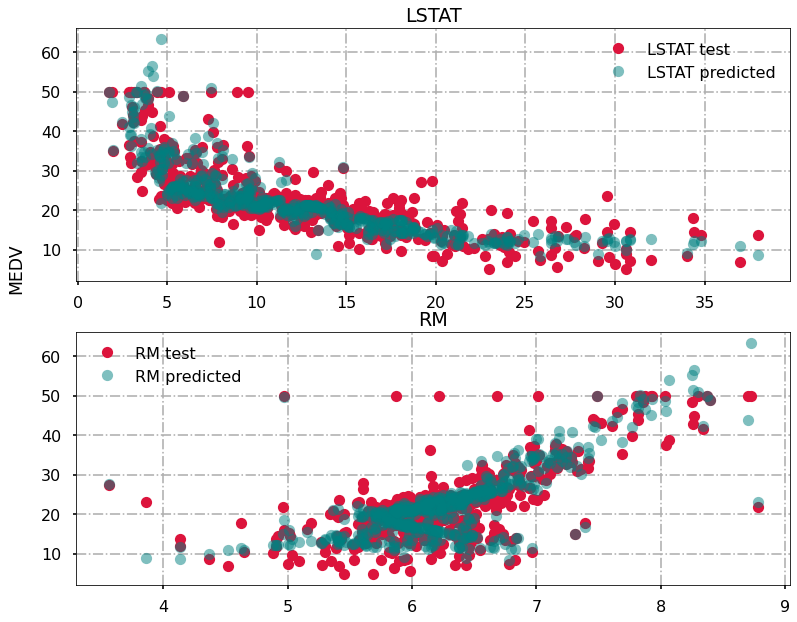

In [42]:
fig, ax = plt.subplots(2)
# ax[0].plot(X_train[:, 0], y_train,'o', label = 'LSTAT train', color = 'teal')
ax[0].plot(x[:, 0], y,'o', label = 'LSTAT test', color = 'crimson')
ax[0].plot(x[:, 0], model.predict(x),'o', label = 'LSTAT predicted', color = 'teal', alpha = 0.5)

# ax[1].plot(X_train[:, 1], y_train,'o', label = 'RM train', color = 'teal')
ax[1].plot(x[:, 1], y,'o', label = 'RM test', color = 'crimson')
ax[1].plot(x[:, 1], model.predict(x),'o', label = 'RM predicted', color = 'teal', alpha = 0.5)

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

In [43]:
#model.save_weights('ModelHd1')
#model.save('ModelHd1')

INFO:tensorflow:Assets written to: ModelHd1\assets
